Gabriel Avinaz

Week 6

4/17/23

## Assignment 6.2
### Assignment 6.2.a

In [1]:
from keras.datasets import cifar10
from keras import layers, models, optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.callbacks import CSVLogger
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape == (50000, 32, 32, 3))
print(x_test.shape == (10000, 32, 32, 3))
print(y_train.shape == (50000, 1))
print(y_test.shape == (10000, 1))

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


x_train = x_train / 255
x_test = x_test / 255

True
True
True
True


In [3]:
model = models.Sequential()

# example of a 3-block vgg style architecture
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [4]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=0.001), metrics=['acc'])

In [5]:
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_datagen.fit(x_train)
test_datagen.fit(x_test)

train_generator = train_datagen.flow(x_train, y_train, batch_size=64)

validation_generator = test_datagen.flow(x_test, y_test, batch_size=64)

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (64, 32, 32, 3)
labels batch shape: (64, 10)


In [6]:
csv_logger = CSVLogger('results/cifar10_model.log')
history = model.fit(train_generator, steps_per_epoch=64, epochs=120, validation_data=(validation_generator), validation_steps=64, callbacks=csv_logger)

Epoch 1/120
64/64 [==============================] - 5s 62ms/step - loss: 2.2633 - acc: 0.2068 - val_loss: 2.0676 - val_acc: 0.2383
Epoch 2/120
64/64 [==============================] - 5s 85ms/step - loss: 1.8967 - acc: 0.3088 - val_loss: 1.6619 - val_acc: 0.3855
Epoch 3/120
64/64 [==============================] - 4s 65ms/step - loss: 1.6811 - acc: 0.3904 - val_loss: 1.5661 - val_acc: 0.4514
Epoch 4/120
64/64 [==============================] - 5s 78ms/step - loss: 1.6069 - acc: 0.4214 - val_loss: 1.6355 - val_acc: 0.4133
Epoch 5/120
64/64 [==============================] - 5s 84ms/step - loss: 1.5241 - acc: 0.4558 - val_loss: 1.6828 - val_acc: 0.4082
Epoch 6/120
64/64 [==============================] - 6s 88ms/step - loss: 1.4715 - acc: 0.4780 - val_loss: 1.3736 - val_acc: 0.5110
Epoch 7/120
64/64 [==============================] - 5s 78ms/step - loss: 1.3625 - acc: 0.5122 - val_loss: 1.3298 - val_acc: 0.5171
Epoch 8/120
64/64 [==============================] - 6s 93ms/step - loss: 1.

In [7]:
model.save('results/cifar10_model.h5')

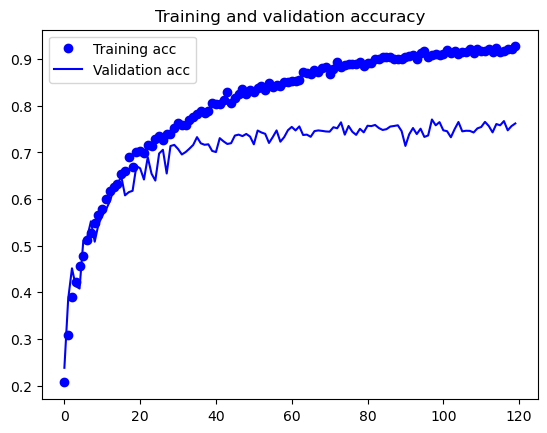

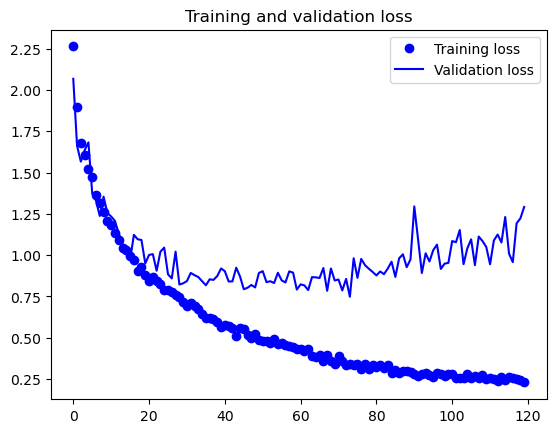

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig("results/cifar10_model_acc.png")
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("results/cifar10_model_loss.png")
plt.show()

### Assignment 6.2.b

In [9]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape == (50000, 32, 32, 3))
print(x_test.shape == (10000, 32, 32, 3))
print(y_train.shape == (50000, 1))
print(y_test.shape == (10000, 1))

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

True
True
True
True


In [10]:
model = models.Sequential()

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


model.summary()

model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=0.001), metrics=['acc'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)       

In [11]:
train_datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_datagen.fit(x_train)
test_datagen.fit(x_test)

train_generator = train_datagen.flow(x_train, y_train, batch_size=64)

validation_generator = test_datagen.flow(x_test, y_test, batch_size=64)

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (64, 32, 32, 3)
labels batch shape: (64, 10)


In [12]:
csv_logger = CSVLogger('results/cifar10_model_augmented.log')
history = model.fit(train_generator, steps_per_epoch=64, epochs=120, validation_data=(validation_generator), validation_steps=64, callbacks=csv_logger)

Epoch 1/120
64/64 [==============================] - 8s 100ms/step - loss: 2.5987 - acc: 0.1233 - val_loss: 2.2408 - val_acc: 0.1531
Epoch 2/120
64/64 [==============================] - 7s 104ms/step - loss: 2.2879 - acc: 0.1453 - val_loss: 2.2575 - val_acc: 0.1772
Epoch 3/120
64/64 [==============================] - 6s 99ms/step - loss: 2.2277 - acc: 0.1663 - val_loss: 2.1114 - val_acc: 0.2622
Epoch 4/120
64/64 [==============================] - 6s 96ms/step - loss: 2.2226 - acc: 0.1555 - val_loss: 2.0919 - val_acc: 0.2185
Epoch 5/120
64/64 [==============================] - 6s 93ms/step - loss: 2.1985 - acc: 0.1626 - val_loss: 2.0392 - val_acc: 0.2537
Epoch 6/120
64/64 [==============================] - 6s 89ms/step - loss: 2.1709 - acc: 0.1711 - val_loss: 1.9590 - val_acc: 0.2747
Epoch 7/120
64/64 [==============================] - 6s 89ms/step - loss: 2.1277 - acc: 0.1946 - val_loss: 1.9386 - val_acc: 0.2859
Epoch 8/120
64/64 [==============================] - 6s 100ms/step - loss:

In [13]:
model.save('results/cifar10_model_augmented.h5')

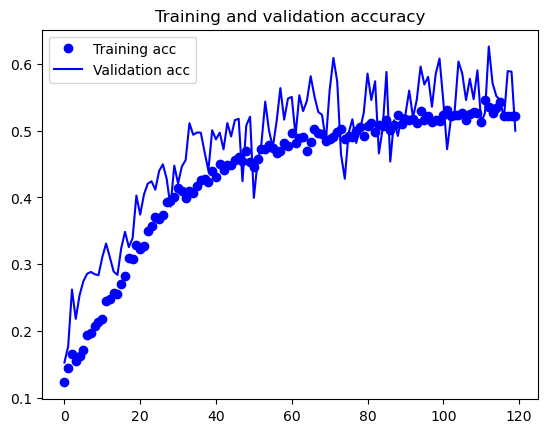

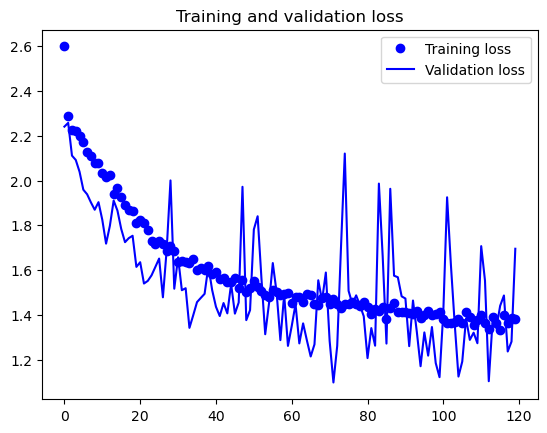

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig("results/cifar10_model_acc_augmented.png")
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("results/cifar10_model_loss_augmented.png")
plt.show()